In [57]:
import csv
import numpy as np
import math as mp
import cmath as cm
from scipy.optimize import fsolve, root, fmin

import matplotlib as mpl
import matplotlib.pyplot as plt

def bestSaveFig(name):
    plt.savefig(name, bbox_inches = 'tight', pad_inches = 0.1, dpi = 500)

In [58]:
def dataGet(stFN):
    boi = csv.reader(open(stFN, "r"), delimiter=',')
    
    dep = []
    real = []
    imag = []
    mag = []
    for row in boi:
        dep.append(float(row[0]))
        real.append(float(row[1]))
        imag.append(float(row[2]))
        mag.append(float(row[3]))
        
    return([dep, real, imag, mag])

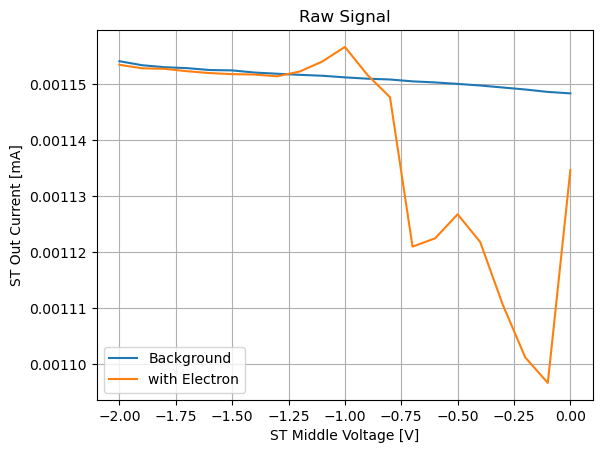

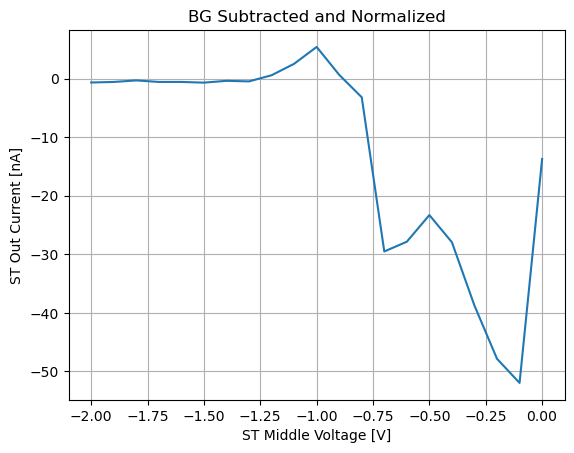

In [61]:
data_stWithout = dataGet("Pinchoff_5541.csv")

tmVec = data_stWith[0][0:int(len(data_stWith[0]) / 2)]

plt.plot(tmVec, data_stWithout[1][0:int(len(data_stWith[0]) / 2)], label = "Background")

data_stWith10s = dataGet("Pinchoff_5539.csv")

plt.plot(tmVec, data_stWith10s[1][0:int(len(data_stWith[0]) / 2)], label = "with Electron")

plt.grid()
plt.xlabel("ST Middle Voltage [V]")
plt.ylabel("ST Out Current [mA]")
plt.title("Raw Signal")
plt.legend()

#bestSaveFig("rawData_curr-v-stm_11apr2025.png")
plt.show()

signal = np.subtract(data_stWith10s[1][0:int(len(data_stWith[0]) / 2)], data_stWithout[1][0:int(len(data_stWith[0]) / 2)])

plt.plot(tmVec, np.multiply(signal, (1e9)/(1e3)))

plt.grid()
plt.xlabel("ST Middle Voltage [V]")
plt.ylabel(r"ST Out Current [nA]")
plt.title("BG Subtracted and Normalized")

#bestSaveFig("curr-v-stm_11apr2025.png")
plt.show()

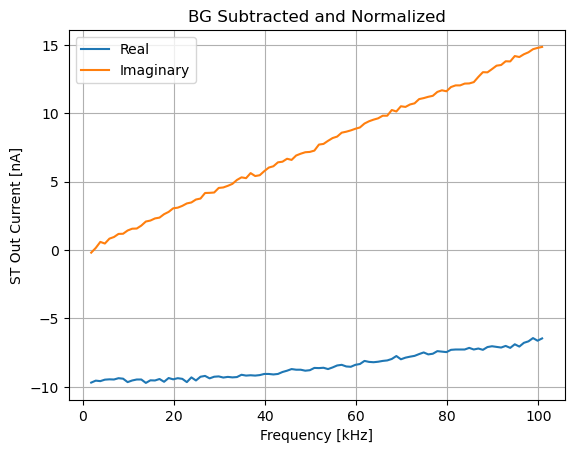

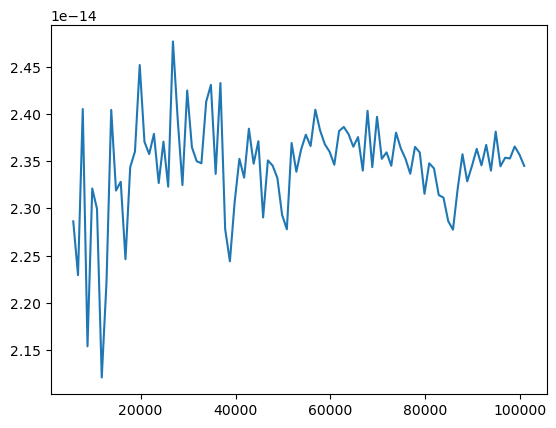

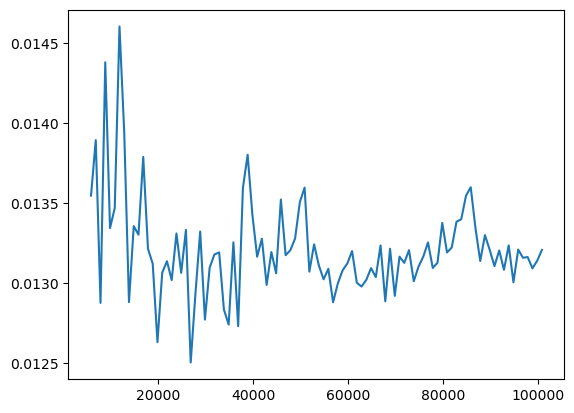

In [66]:
fn_freqElectrons = "FrequencySweep_5536.csv"
data_freqElectrons = dataGet(fn_freqElectrons)

fn_freqNoElectrons = "FrequencySweep_5543.csv"
data_freqNoElectrons = dataGet(fn_freqNoElectrons)

#not here the no electrons signal was taken at double the imput voltage
freq_realSig = np.divide(np.subtract(data_freqElectrons[1], np.multiply(data_freqNoElectrons[1], 0.5)), 1000)
freq_imagSig = np.divide(np.subtract(data_freqElectrons[2], np.multiply(data_freqNoElectrons[2], 0.5)), 1000)

plt.plot(np.multiply(data_freqElectrons[0], 1e-3), np.multiply(freq_realSig, 1e9), label = "Real")
plt.plot(np.multiply(data_freqElectrons[0], 1e-3), np.multiply(freq_imagSig, 1e9), label = "Imaginary")

plt.grid()
plt.xlabel("Frequency [kHz]")
plt.ylabel(r"ST Out Current [nA]")
plt.title("BG Subtracted and Normalized")
plt.legend()

#bestSaveFig("curr-v-freq_11apr2025.png")
plt.show()

cap_freq = data_freqElectrons[0][4:]
caps = np.divide(freq_imagSig[4:], np.multiply(2 * np.pi, cap_freq))
dVec = np.divide(8.85e-12 * (3.5e-3 * 10e-3), caps)

plt.plot(cap_freq, caps)
plt.show()

plt.plot(cap_freq, dVec)
plt.show()
